In [1]:
from __future__ import print_function

from traitlets.config.manager import BaseJSONConfigManager
path = '/Users/jmk/anaconda2/envs/data601/etc/jupyter/nbconfig'
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'theme': 'night',
              'scroll': True,
              #'transition': 'zoom',
              'start_slideshow_at': 'selected',
})

{'scroll': True, 'start_slideshow_at': 'selected', 'theme': 'night'}

# Dimensionality Reduction

Another approach for reducing the number of features required is _dimensionality reduction_, an unsupervised approach that _transforms_ the feature vectors into a lower dimensional space.  

Features are not preserved as with feature _selection_ but rather the entire feature vector is transformed into a smaller feature vector.

This can be considered a kind of _compression_.

## Types of Dimensionality Reduction

Dimensionality reduction algorithms may be _linear_ (e.g. PCA) or _nonlinear_ (e.g. Locally Linear Embedding, t-SNE, MDS, ...).  

As with most unsupervised techniques, the choice of algorithm tends to be application specific.  

When used **for visualization**, you will likely try multiple approaches and use whichever one supports your story.

When used **as a pre-processing step in supervised learning**, you will often include the choice of algorithm and its hyperparameters as options in your grid search.  The final choice of parameters will be based on the best overall fit during grid search.

## Principal Component Analysis

PCA looks for a combination of features that captures the variance of the original features.  From a linear algebra perspective, you can think of this as finding a new basis (set of axes) in the lower dimensional space that is oriented to optimize the amount of variance explained by each dimension.  The first principal component explains the most variance, the second principal component the second most, etc.

![pca-example.png](pca-example.png)


(from http://setosa.io/ev/principal-component-analysis/)

Automatically created module for IPython interactive environment
Original shape of X:  (150, 4)
post-PCA shape of X:  (150, 1)
Note that in this case we map x and y to the same feature to simplify graphing.  This produces the diagonal effect seen here.


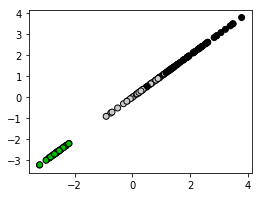

In [3]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_components = 1

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

print('Original shape of X: ', X.shape)

plt.cla()
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
X = pca.transform(X)
print('post-PCA shape of X: ', X.shape)

#  Customize the rendering based on the number of principal components.
if n_components == 3:
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean() + 1.5,
                  X[y == label, 2].mean(), name,
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
               edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
elif n_components == 2:
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.nipy_spectral,
               edgecolor='k')
elif n_components == 1:
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    plt.scatter(X[:, 0], X[:, 0], c=y, cmap=plt.cm.nipy_spectral,
               edgecolor='k')
    print('Note that in this case we map x and y to the same feature to simplify graphing.  This produces the diagonal effect seen here.')

plt.show()

# A comparison of nonlinear manifold learning techniques

One subset of nonlinear models of dimensionality reduction are called _manifold learning_ techniques.  These assume that the data lie along a lower dimensional subset (or manifold) of the full dimensional space.   

The following example shows several manifold learning approaches applied to a 3D data set called the "s-curve" because of the way it exists as a 2D sheet curved through 3D space like an "S".

Automatically created module for IPython interactive environment
standard: 0.16 sec
ltsa: 0.25 sec
hessian: 0.31 sec
modified: 0.23 sec
Isomap: 0.43 sec
MDS: 1.7 sec
SpectralEmbedding: 0.061 sec
t-SNE: 20 sec


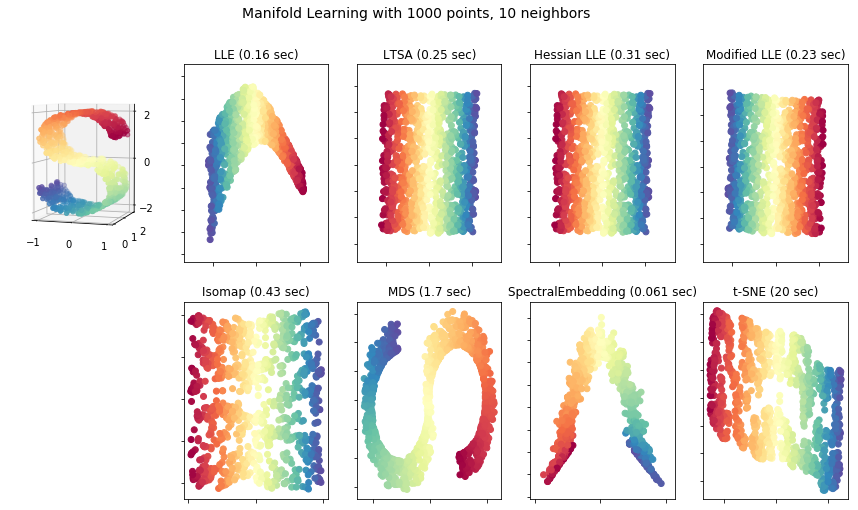

In [4]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

While the details of these algorithms are beyond the scope of this class, note that the run time and behavior of these are very different which shows that the optimal algorithm will depend on the characteristics of the dataset.